# Inteligência Artificial e Machine Learning

Neste projeto, o objetivo é construir uma rede neural para analisar e modelar
um conjunto de dados experimentais produzido pelo NASA no final dos anos 80.
Esses dados foram produzidos em um túnel de vento e visavam compreender a
produção de ruído no entorno de uma asa. No entanto, não será dada ênfase a
interpretações físicas (a não ser que alguns de vocês tenham interesse específico).
A ideia é construir essa rede neural através de uma regressão e a atenção se
voltar para essa tarefa. Os dados contém cinco entradas (frequência, ângulo de
ataque, tamanho da corda, velocidade do escoamento entorno da asa e largura
de sucção) e uma saída (pressão). Portanto, a rede após treinada poderá ajudar
na compreensão das relações de causalidade e predizer a intensidade do som
(pressão) em situações em que não foram conduzidos experimentos.
Os dados estão disponíveis em: [aqui](http://archive.ics.uci.edu/ml/datasets/Airfoil+Self+Noise). 
São de acesso universal, requerendo apenas cuidados na citação em artigos.
Em seguida, é sugerido um roteiro (não é rígido e nem precisa ser seguido,
mas espera-se que ajude a explorar melhor o projeto para seu aprendizado).

Este roteiro é constituído de três etapas detalhadas abaixo.

---
* Etapa 1: análise preliminar de dados. Aqui você pode usar ferramentas
que permitam analisar os dados a partir de sua visualização. Típicamente,
são empregues gráficos de dispersão (scatter plots), que permitem qualitativamente
identificar correlações entre as entradas e entre entradas e
saídas. Permitem, também traçar uma visão do conjunto de entrada e
como ele está coberto pelos dados (há regiões em que falta cobertura?)

* Etapa 2: Treinamento da rede. Construa uma função de perda e inclua
nesta um termo de regularização. A arquitetura básica a ser utilizada
envolve apenas uma camada interna (caberá a você escolher um número
de neurônios) considerando funções sigmóides para a ativação. Importante
dar ênfase para validação do seu modelo.

* Etapa 3: Analisar aspectos que julgue pertinentes do algoritmo de treinamento
(tamanho do batch, valor do parâmetro de regularização, valor da
taxa de aprendizagem,...)

* Obs.1: o projeto pode ser desenvolvido por grupos de até três alunos.
* Obs. 2: O conjunto de dados é constituído de 1503 dados (cado dado contém
5 entradas e uma saída). Se você tiver dificuldades em trabalhar com um conjunto
desse tamanho, pode extrair (usando algum racional) um subconjunto de
tamanho mais apropriado para seus recursos computacionais.

## Informações do conjunto de dados
### Informações adicionais

O conjunto de dados da NASA compreende aerofólios NACA 0012 de tamanhos diferentes em várias velocidades de túnel de vento e ângulos de ataque. A envergadura do aerofólio e a posição do observador foram as mesmas em todos os experimentos. 

Tem valores ausentes?

> Não

**Tabela de Variavéis** 

|Nome da variável|	Papel|	Tipo|	Descrição|	Unidades|	Valores ausentes|
|---|---|---|---|---|---|
|frequência|	Característica|	Inteiro|	|	Hz|	Não|
|ângulo de ataque|	Característica|	Binário	|	|Graus|	Não|
|comprimento da corda|	Característica|	Contínuo|  |		m|	Não|
|velocidade de fluxo livre|	Característica|	Contínuo|	|	M|	Não|
|sucção-lado-deslocamento-espessura|	Característica|	Contínuo|	|	m|	Não|
|escala de pressão sonora|	Alvo|	Contínuo|	|	Db|	Não|

### Informações adicionais sobre variáveis

Esse problema tem as seguintes entradas:
1. Frequência, em Hertzs. 
2. Ângulo de ataque, em graus. 
3. Comprimento da corda, em metros.
4. Velocidade de fluxo livre, em metros por segundo. 
5. Espessura do deslocamento do lado da sucção, nos medidores. 
A única saída é:
6. Nível de pressão sonora escalonado, em decibéis. 



In [ ]:
!pip3 install -U ucimlrepo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import seaborn as sns

In [ ]:
# fetch dataset 
#airfoil_self_noise = fetch_ucirepo(id=291) 
  
# data (as pandas dataframes) 
#X = airfoil_self_noise.data.features 
#y = airfoil_self_noise.data.targets 
  

In [2]:
airfoil_self_noise = pd.read_table('./airfoil+self+noise/airfoil_self_noise.dat',
                                   names=["frequência","angulo_ataque","comprimento_corda","velocidade_fluxo",
                                          "espessura_sucção","pressão_sonora"])
#names=["frequency","attack-angle","chord-length","free-stream-velocity",
#"suction-side-displacement-thickness","scaled-sound-pressure"]
X = airfoil_self_noise.iloc[:,0:5]
y = airfoil_self_noise.iloc[:,5:6]

In [ ]:
# metadata 
print(airfoil_self_noise.metadata) 
  
# variable information 
print(airfoil_self_noise.variables) 

{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [3]:
X

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


# Análise descritiva dos dados

In [4]:
airfoil_self_noise.describe().apply(lambda x: x.apply('{0:g}'.format))

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção,pressão_sonora
count,1503,1503,1503,1503,1503,1503
mean,2886.38,6.7823,0.136548,50.8607,0.0111399,124.836
std,3152.57,5.91813,0.0935407,15.5728,0.0131502,6.89866
min,200,0,0.0254,31.7,0.000400682,103.38
25%,800,2,0.0508,39.6,0.00253511,120.191
50%,1600,5.4,0.1016,39.6,0.00495741,125.721
75%,4000,9.9,0.2286,71.3,0.0155759,129.995
max,20000,22.2,0.3048,71.3,0.0584113,140.987


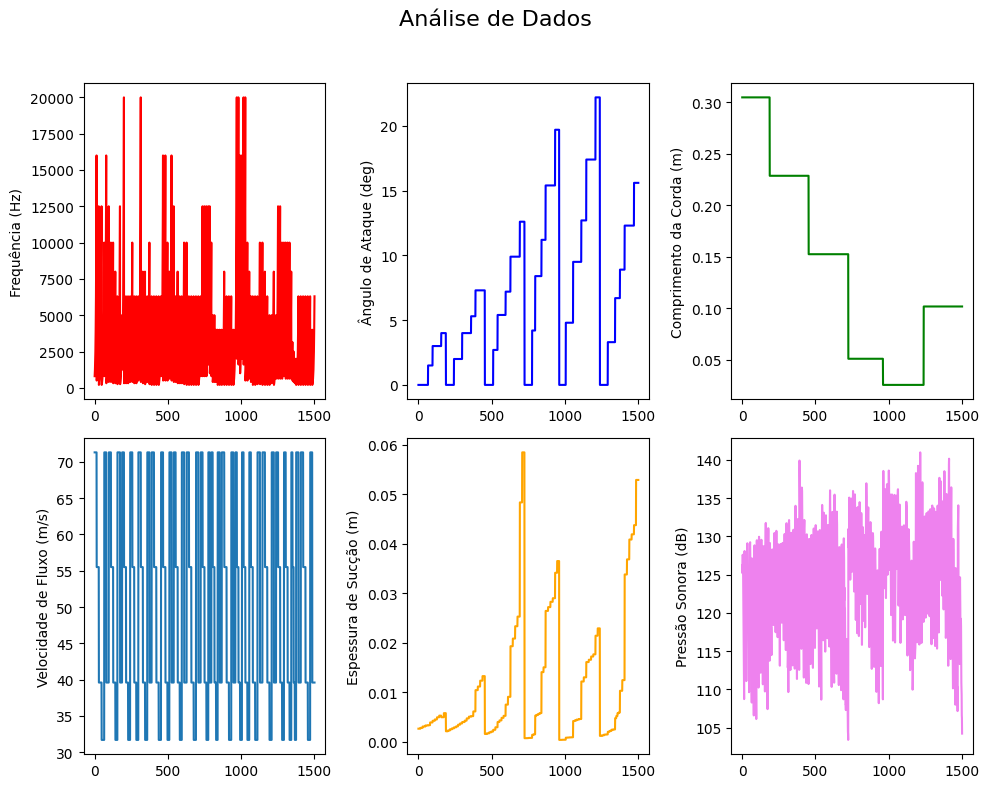

In [3]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3)  # 2 linhas, 3 colunas

ax = fig.add_subplot(gs[0, 0])
ax.plot(X["frequência"], color='r')
ax.set_ylabel('Frequência (Hz)')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(X["angulo_ataque"], color='b')
ax2.set_ylabel('Ângulo de Ataque (deg)')

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(X["comprimento_corda"], color='g')
ax3.set_ylabel('Comprimento da Corda (m)')

ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(X["velocidade_fluxo"])
ax4.set_ylabel('Velocidade de Fluxo (m/s)')

ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(X["espessura_sucção"],color="orange")
ax5.set_ylabel('Espessura de Sucção (m)')

ax6 = fig.add_subplot(gs[1, 2])
ax6.plot(y, color='violet')
ax6.set_ylabel('Pressão Sonora (dB)')

fig.suptitle('Análise de Dados', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para não sobrepor o título
plt.savefig('img/t1_data_set.png', format='png')
plt.show()

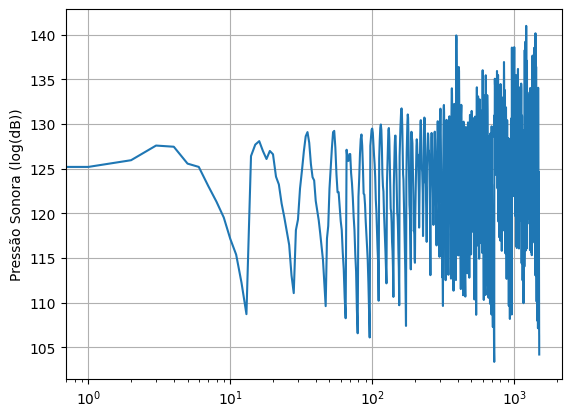

In [4]:
plt.semilogx(y)
plt.ylabel('Pressão Sonora (log(dB))')
plt.savefig('img/t1_scaled_sound_pressure_log.png',format="png")
plt.grid()
plt.show()

## Gráfico de disperssão

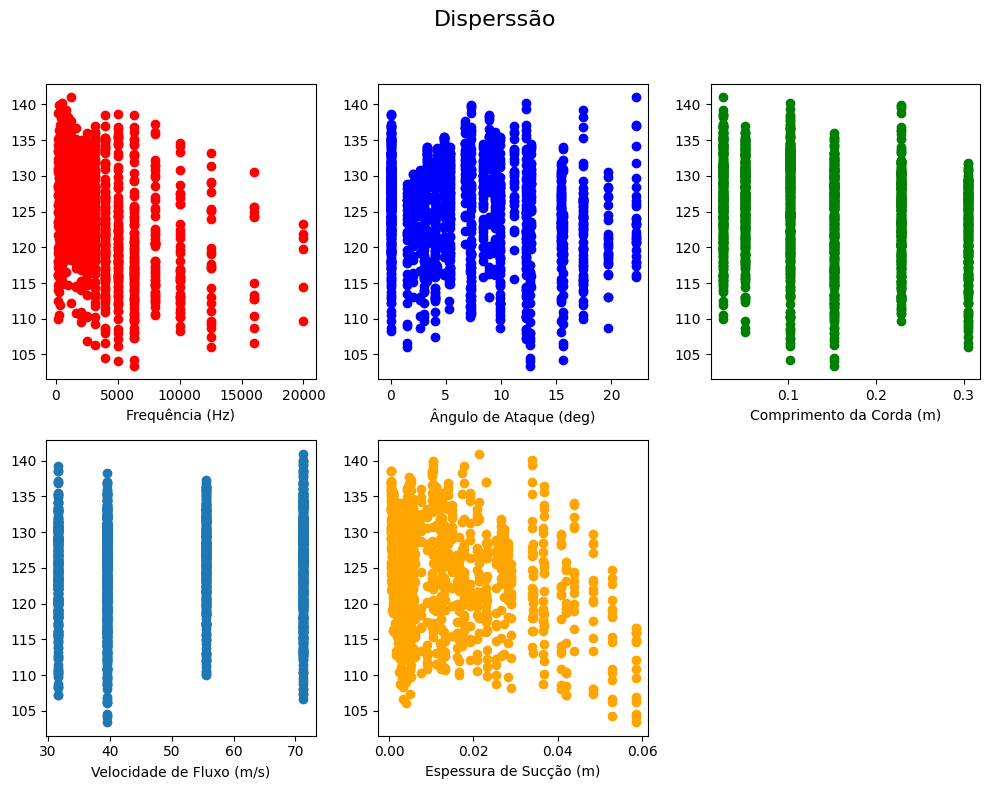

In [5]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3)  # 2 linhas, 3 colunas

ax = fig.add_subplot(gs[0, 0])
ax.scatter(X["frequência"],y, color='r')
ax.set_xlabel('Frequência (Hz)')

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(X["angulo_ataque"],y, color='b')
ax2.set_xlabel('Ângulo de Ataque (deg)')

ax3 = fig.add_subplot(gs[0, 2])
ax3.scatter(X["comprimento_corda"],y, color='g')
ax3.set_xlabel('Comprimento da Corda (m)')

ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(X["velocidade_fluxo"],y)
ax4.set_xlabel('Velocidade de Fluxo (m/s)')

ax5 = fig.add_subplot(gs[1, 1])
ax5.scatter(X["espessura_sucção"],y,color="orange")
ax5.set_xlabel('Espessura de Sucção (m)')

fig.suptitle('Disperssão', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para não sobrepor o título
plt.savefig('img/t1_input_output.png', format='png')
plt.show()

### Scatter Plots com LOWESS?
Um scatter plot (gráfico de dispersão) mostra os valores de duas variáveis, permitindo visualizar padrões, tendências e dispersões. No contexto de regressão, queremos ver como cada variável de entrada se relaciona com a variável de saída.

**LOWESS (ou LOESS)**
LOWESS significa Locally Weighted Scatterplot Smoothing. É um método não paramétrico que ajusta uma curva suave sobre os dados no gráfico de dispersão, revelando relações não lineares entre as variáveis.

- Ele não assume uma forma específica da relação (linear, polinomial, etc.).

- A curva é ajustada localmente em torno de cada ponto.

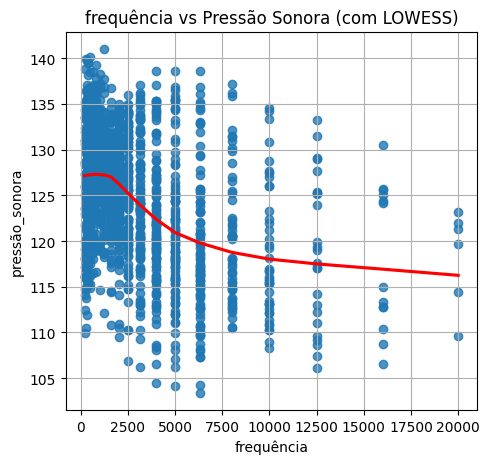

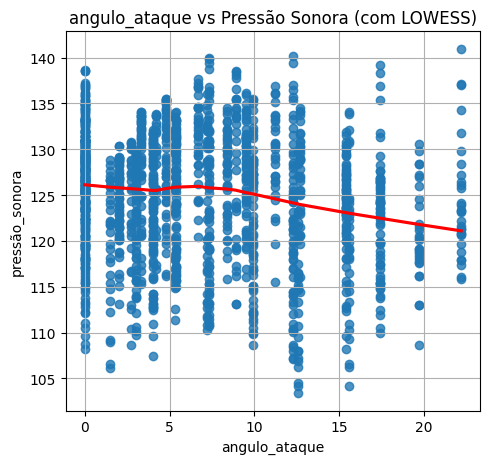

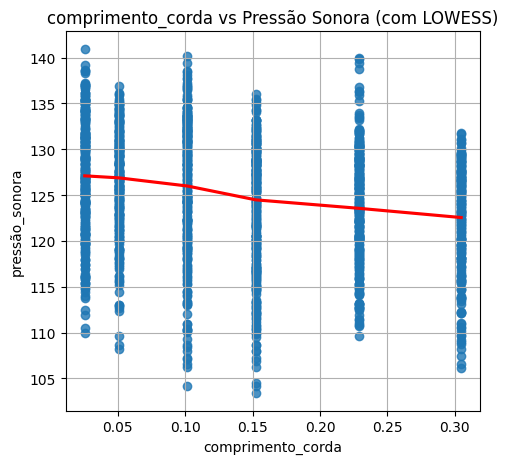

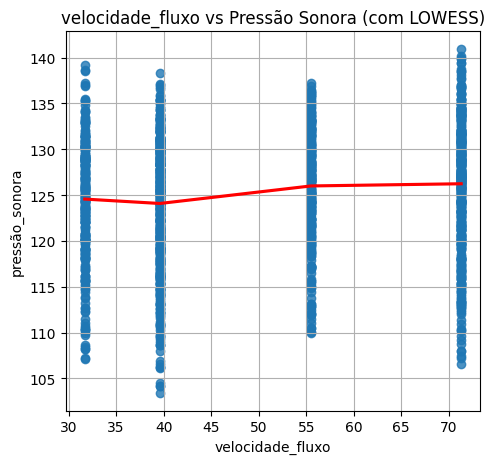

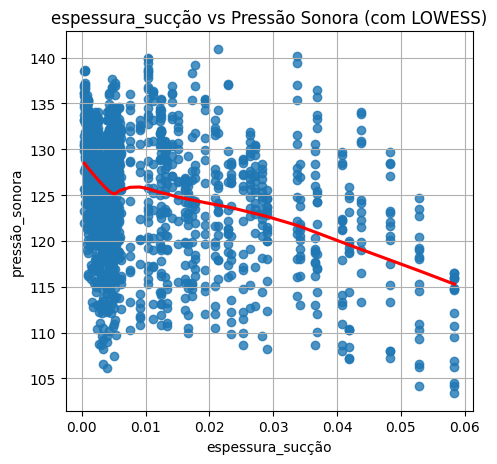

In [14]:
# Gerar scatter plot com curva LOWESS para cada entrada
for coluna in airfoil_self_noise.columns[:-1]:  # Exclui a variável alvo
    g=sns.lmplot(
        x=coluna,
        y='pressão_sonora',
        data=airfoil_self_noise,
        lowess=True,
        line_kws={'color': 'red'}
    )
    g.ax.grid(True, axis='both')
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    plt.title(f'{coluna} vs Pressão Sonora (com LOWESS)')
    plt.xlabel(coluna)
    plt.ylabel('pressão_sonora')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'img/t1_disperssao_lowess_{coluna}.png',format='png')
    plt.show()

### Como interpretar os gráficos?
- Se a curva não for reta, isso indica uma relação não linear.

- Uma curva descendente indica que, à medida que a variável aumenta, a pressão sonora tende a diminuir (e vice-versa).

- Ondulações ou curvaturas mais complexas sugerem relações mais complicadas, que redes neurais conseguem modelar melhor do que modelos lineares.

### 1. **Frequência vs Pressão Sonora**

* A curva mostra uma **clara tendência decrescente**.
* Isso confirma a **correlação negativa moderada**: conforme a frequência aumenta, a pressão sonora tende a diminuir.
* **Relação não linear suave**, com declínio mais acentuado em frequências mais baixas.

---

### 2. **Ângulo de Ataque vs Pressão Sonora**

* A curva tem uma **leve queda**, mas quase plana.
* Confirma que há **pouca influência direta**, talvez com pequenas oscilações não lineares.
* Pode indicar que esta variável tem influência **condicional** (em interação com outras variáveis).

---

### 3. **Comprimento da Corda vs Pressão Sonora**

* A relação é **ligeiramente não linear**, com uma **tendência decrescente**.
* Sugere que aerofólios com corda maior tendem a produzir um pouco menos de ruído.
* A não linearidade é suave, o que pode ser modelado por redes neurais.

---

### 4. **Velocidade de Fluxo vs Pressão Sonora**

* A curva é **ligeiramente ascendente**, mas bem suave.
* Mostra uma **influência fraca**, mas crescente da velocidade no aumento da pressão sonora.
* Reforça a correlação positiva fraca vista anteriormente.

---

### 5. **Espessura de Sucção vs Pressão Sonora**

* Curva **descendente**, com alguma variação suave.
* Mostra uma **relação inversa não linear**: maior espessura tende a reduzir o ruído.
* Pode ser uma variável significativa no modelo.

---

## ✅ **Conclusão**

* As variáveis `frequencia` e `espessura_succao` apresentam **relações não lineares moderadamente fortes** com a saída e devem ser valorizadas no modelo.
* As outras variáveis têm relações fracas, mas ainda assim podem ser relevantes em **interações não lineares**, que a rede neural pode capturar bem.


## Histogramas

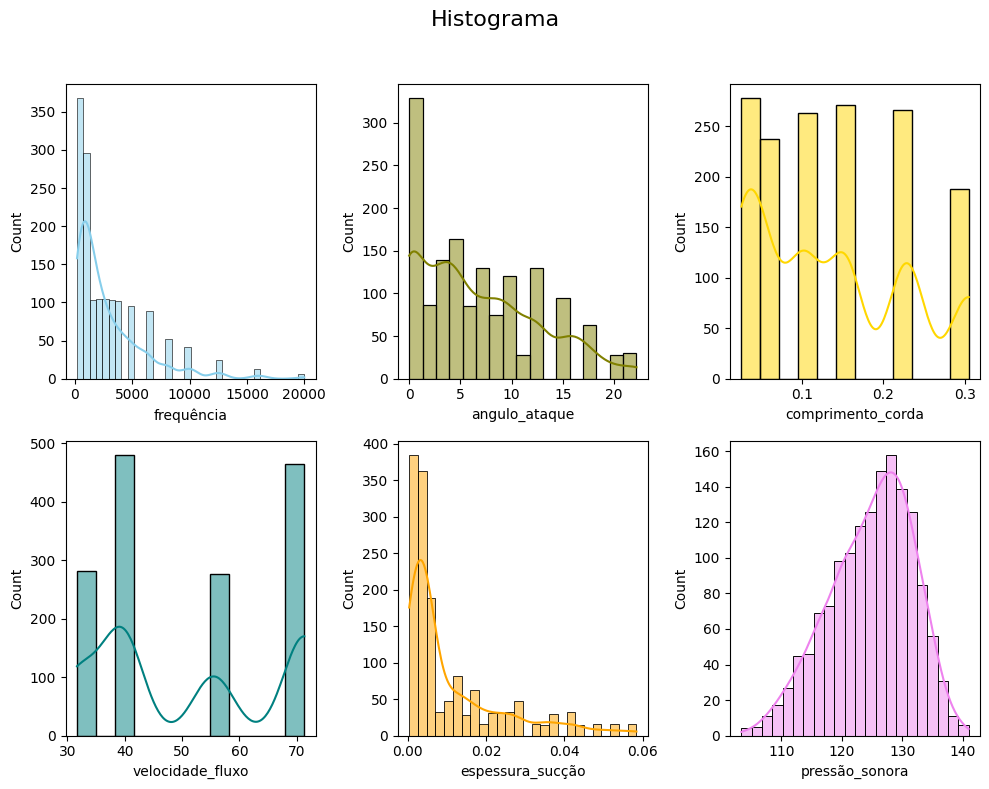

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

sns.histplot(data=X, x="frequência", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X, x="angulo_ataque", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X, x="comprimento_corda", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=X, x="velocidade_fluxo", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=X, x="espessura_sucção", kde=True, color="orange", ax=axs[1, 1])
sns.histplot(data=y, x="pressão_sonora", kde=True, color="violet", ax=axs[1, 2])


fig.suptitle('Histograma', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para não sobrepor o título
plt.savefig('img/t1_hist_dataset.png', format='png')
plt.show()

## Correlação dos dados

### O que é a matriz de correlação de Pearson?

A **matriz de correlação de Pearson** é uma tabela que mostra o **coeficiente de correlação de Pearson** entre pares de variáveis numéricas. Cada valor na matriz mede a **intensidade e direção da relação linear** entre duas variáveis.

---

### Coeficiente de Pearson (r)

É um valor entre **-1 e +1**:

* **+1** → correlação linear **positiva perfeita**: quando uma variável aumenta, a outra também aumenta.
* **-1** → correlação linear **negativa perfeita**: quando uma variável aumenta, a outra diminui.
* **0** → **sem correlação linear**: não há tendência linear entre as variáveis.

---

### Fórmula matemática

Para duas variáveis $X$ e $Y$:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

* $\bar{X}$, $\bar{Y}$: médias das variáveis.
* O numerador é a **covariância** entre $X$ e $Y$.
* O denominador normaliza pela variabilidade (desvio padrão) de cada variável.

---

### A matriz

Quando temos várias variáveis $X_1, X_2, \ldots, X_n$, a matriz de correlação é uma matriz $n \times n$ onde:

* A posição $(i, j)$ representa a correlação entre $X_i$ e $X_j$.
* A diagonal é sempre 1 (uma variável é perfeitamente correlacionada com ela mesma).

---

### Importância na análise de dados

* Ajuda a identificar **relações fortes entre entradas e saída**.
* Pode revelar **colinearidade entre entradas**, o que pode causar problemas em alguns modelos.
* É um **primeiro passo rápido** para entender como os dados se comportam.

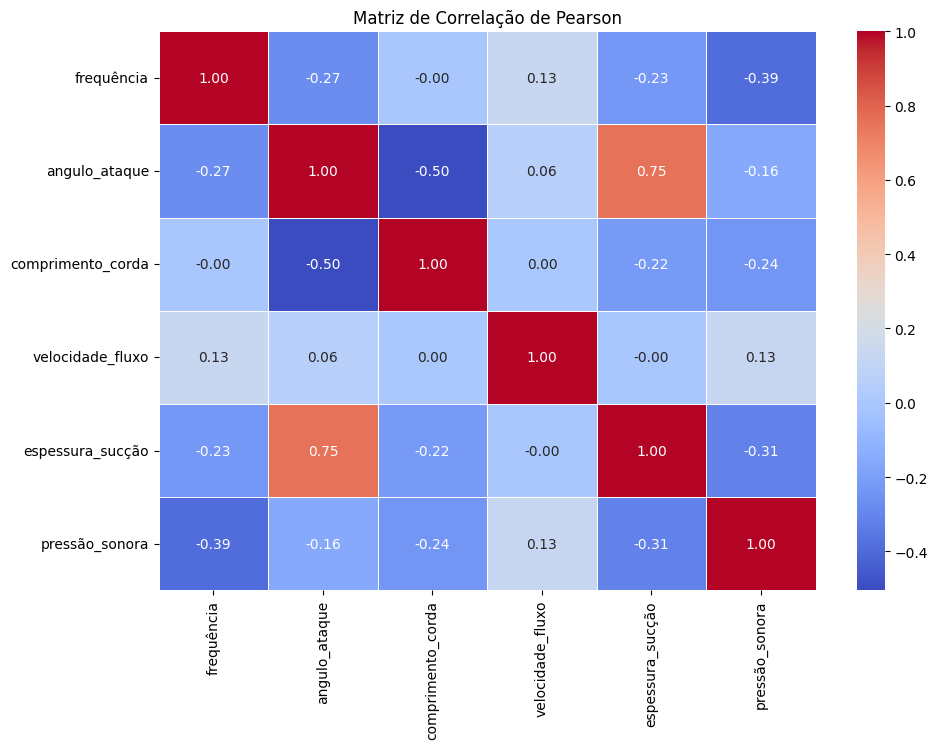

In [15]:
#df = X.copy()
#df['scaled-sound-pressure'] = y

# Calcular matriz de correlação
corr = airfoil_self_noise.corr()

# Visualizar com heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Pearson')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('img/t1_matriz_correlacao.png',format='png')
plt.show()

## Correlação com a variável alvo (`pressão_sonora`)

| Variável                              | Correlação com `pressão_sonora` | Interpretação                                                                                                                                    |
| ------------------------------------- | -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| `frequência`                           | **-0.39**                              | Moderada negativa – Quanto maior a frequência, **menor tende a ser** a pressão sonora. Indica que frequência é relevante, com tendência inversa. |
| `angulo_ataque`                        | **-0.16**                              | Fraca negativa – A influência do ângulo de ataque na pressão sonora é **fraca**, mas há uma leve tendência inversa.                              |
| `comprimento_corda`                        | **-0.24**                              | Fraca a moderada negativa – Alguma influência da corda na redução da pressão sonora.                                                             |
| `velocidade_fluxo`                | **+0.13**                              | Fraca positiva – Pouca influência direta, mas há uma leve tendência de aumento da pressão sonora com velocidade.                                 |
| `espessura_sucção` | **-0.31**                              | Moderada negativa – Mostra uma influência inversa: deslocamentos maiores tendem a reduzir a pressão sonora.                                      |

---

### Resumo das variáveis mais correlacionadas com a saída:

As variáveis mais relevantes, com base na **correlação linear**, são:

* 📉 `frequência` (correlação negativa moderada)
* 📉 `espessura_succão` (correlação negativa moderada)
* 📉 `comprimento_corda` (correlação fraca a moderada negativa)

Essas devem ter um peso mais importante na predição.

---

## ⚠️ **Importante lembrar:**

* A **correlação de Pearson detecta apenas relações lineares**. Como você vai usar uma **rede neural (modelo não linear)**, variáveis com baixa correlação ainda podem ser importantes.
* A rede neural pode aprender interações **não lineares e combinadas** entre variáveis, que não aparecem na correlação simples.



## Outliers e Normalização

## ✅ **1. Por que verificar outliers e normalizar os dados?**

### 🔎 **Outliers**

**Outliers** são valores extremos que estão muito distantes dos outros dados. Verificá-los é importante porque:

* Podem **distorcer o aprendizado** da rede neural, fazendo com que o modelo foque demais nesses pontos raros.
* Podem **influenciar estatísticas** como média e variância, prejudicando normalizações.
* Algumas redes neurais (especialmente com sigmoide ou tanh) são **sensíveis a variações extremas**, pois suas ativações saturam.

### ⚖️ **Normalização**

Normalizar os dados (trazer para uma mesma escala) é essencial para:

* Evitar que variáveis com grande escala (ex: frequência em Hz) dominem as de escala pequena (ex: comprimento em m).
* **Acelerar o treinamento** e melhorar a convergência do otimizador.
* Deixar o espaço de entrada mais bem **condicionado** para modelos como redes neurais.

---

## 🧮 **2. Por que escolhemos Z-score e como usá-lo?**

### ✅ O que é Z-score?

O **Z-score** mede quantos desvios padrão um valor está acima ou abaixo da média:

$$
z = \frac{x - \mu}{\sigma}
$$

* $x$: valor individual
* $\mu$: média da variável
* $\sigma$: desvio padrão

### 🎯 Por que usar Z-score?

* É **simples**, **eficiente** e **muito usado** em detecção de outliers quando os dados têm **distribuição próxima da normal**.
* Permite detectar valores que estão **muito afastados da média** (geralmente usa-se |z| > 3).


## 🧪 **3. Código Python: Verificar outliers e normalizar dados com Z-score**

In [4]:
import numpy as np
from scipy import stats

# 1. Detectar Outliers usando Z-score
z_scores = np.abs(stats.zscore(airfoil_self_noise))           # calcula z-score absoluto
outliers = z_scores > 3                        # define outliers como z > 3
outliers_por_variavel = pd.Series(np.sum(outliers, axis=0), index=airfoil_self_noise.columns)

#print("Quantidade de outliers por variável:")
outliers_por_variavel

frequência           44
angulo_ataque         0
comprimento_corda     0
velocidade_fluxo      0
espessura_sucção     32
pressão_sonora        2
dtype: int64

In [5]:
# 2. Normalizar dados (Z-score)
df_normalizado = (airfoil_self_noise - airfoil_self_noise.mean()) / airfoil_self_noise.std()
#print("\nEstatísticas após normalização (Z-score):")
df_normalizado.describe()

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção,pressão_sonora
count,1.503000e+03,1.503000e+03,1.503000e+03,1.503000e+03,1503.000000,1.503000e+03
mean,6.854870e-17,1.134599e-16,-1.512799e-16,-6.074833e-16,0.000000,-2.949958e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-8.521232e-01,-1.146021e+00,-1.188234e+00,-1.230399e+00,-0.816655,-3.110162e+00
25%,-6.618024e-01,-8.080768e-01,-9.166941e-01,-7.231042e-01,-0.654344,-6.733112e-01
50%,-4.080415e-01,-2.335708e-01,-3.736152e-01,-7.231042e-01,-0.470141,1.282941e-01
75%,3.532414e-01,5.268047e-01,9.840822e-01,1.312498e+00,0.337334,7.479075e-01
max,5.428461e+00,2.605165e+00,1.798701e+00,1.312498e+00,3.594721,2.341189e+00


### boxplots

boxplot é um diagrama de caixa que mostra o resumo das propriedades de um conjunto de valores numéricos como mínimo, primeiro quartil, mediana, terceiro quartil e máximo.
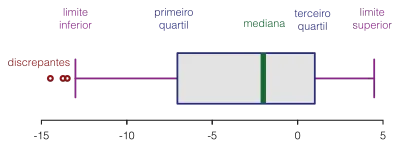

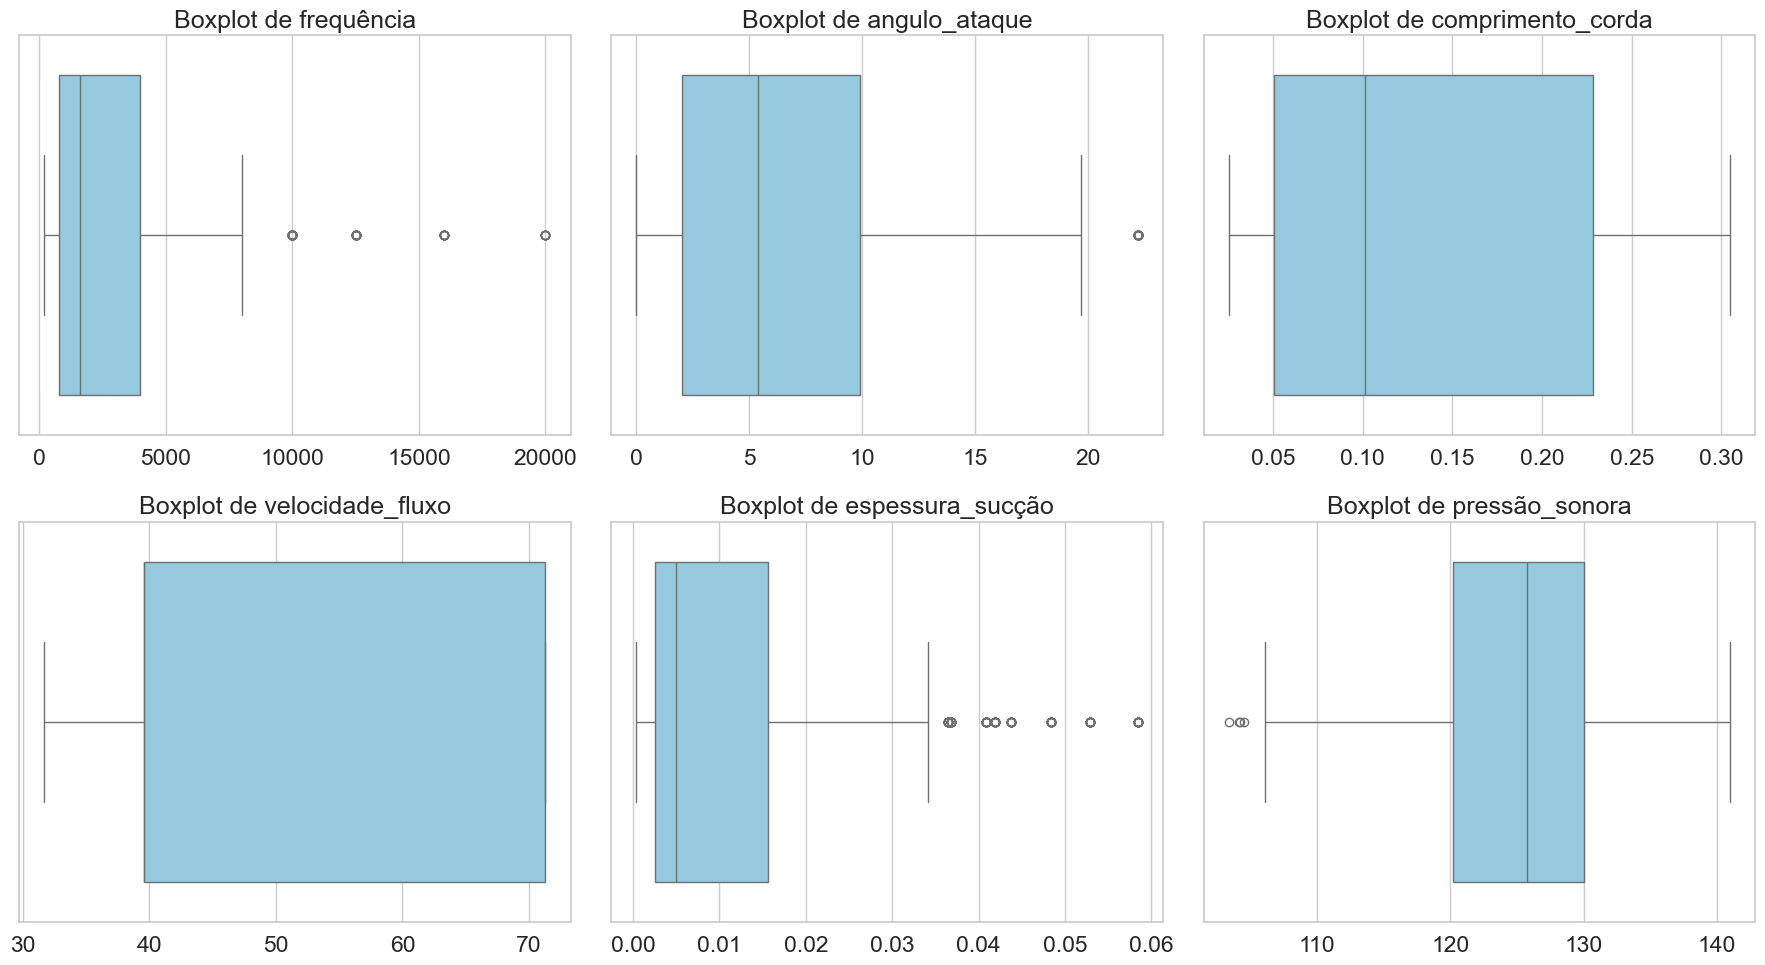

In [23]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid", font_scale=1.5)

# Criar boxplots para cada variável
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # cria um grid 2x3
axes = axes.flatten()  # achata para iterar facilmente

for idx, coluna in enumerate(airfoil_self_noise.columns):
    sns.boxplot(data=airfoil_self_noise, x=coluna, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Boxplot de {coluna}')
    axes[idx].set_xlabel("")  # remove o nome do eixo X para estética

plt.tight_layout()
plt.savefig('img/t1_boxplot.png',format='png')
plt.show()

### Interpretação dos boxplots:
1. **Frequência**
- Há vários outliers no extremo superior.
- Isso confirma a contagem alta de outliers via Z-score.
- Os valores se estendem até 20.000 Hz.

2. **Ângulo de Ataque**
- Distribuição compacta, sem outliers visíveis.
- Dados bem comportados.

3. **Comprimento da Corda**
- Sem outliers relevantes.
- Variação pequena.

4. **Velocidade do Fluxo Livre**
- Distribuição bem centrada, sem outliers aparentes.

5. **Espessura de Sucção**
- Alguns outliers visíveis no lado superior.
- Confirmado também pelo Z-score.

6. **Pressão Sonora**
- Alguns poucos outliers inferiores.
- Mas a maioria dos dados está bem distribuída.

# Machine Learning

- Tensor flow
- 1 hidden layer com 10 neurônios
- Ativação: sigmoide
- Otimizador: Adam (com taxa de aprendizado decaindo exponencialmente)
- Loss: MSE
- Mini-batch: 32
- Epochs: 100 a 300


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from scipy import stats

In [20]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Carregar os dados normalizados
airfoil_self_noise = pd.read_table('./airfoil+self+noise/airfoil_self_noise.dat',
                                   names=["frequência","angulo_ataque","comprimento_corda","velocidade_fluxo",
                                          "espessura_sucção","pressão_sonora"])
df_normalizado = (airfoil_self_noise - airfoil_self_noise.mean()) / airfoil_self_noise.std()

In [34]:
df_normalizado = (airfoil_self_noise - airfoil_self_noise.mean()) / airfoil_self_noise.std()
df_normalizado

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção,pressão_sonora
0,-0.661802,-1.146021,1.798701,1.312498,-0.644590,0.197873
1,-0.598362,-1.146021,1.798701,1.312498,-0.644590,0.052917
2,-0.519062,-1.146021,1.798701,1.312498,-0.644590,0.161634
3,-0.408041,-1.146021,1.798701,1.312498,-0.644590,0.399361
4,-0.281161,-1.146021,1.798701,1.312498,-0.644590,0.380517
...,...,...,...,...,...,...
1498,-0.122560,1.489947,-0.373615,-0.723104,3.171717,-2.112287
1499,0.083620,1.489947,-0.373615,-0.723104,3.171717,-2.258692
1500,0.353241,1.489947,-0.373615,-0.723104,3.171717,-2.642825
1501,0.670443,1.489947,-0.373615,-0.723104,3.171717,-2.697908


In [33]:
z_scores = stats.zscore(airfoil_self_noise)
z_scores

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção,pressão_sonora
0,-0.662023,-1.146403,1.799299,1.312935,-0.644805,0.197939
1,-0.598561,-1.146403,1.799299,1.312935,-0.644805,0.052935
2,-0.519235,-1.146403,1.799299,1.312935,-0.644805,0.161688
3,-0.408177,-1.146403,1.799299,1.312935,-0.644805,0.399494
4,-0.281255,-1.146403,1.799299,1.312935,-0.644805,0.380644
...,...,...,...,...,...,...
1498,-0.122601,1.490443,-0.373740,-0.723345,3.172773,-2.112990
1499,0.083648,1.490443,-0.373740,-0.723345,3.172773,-2.259444
1500,0.353359,1.490443,-0.373740,-0.723345,3.172773,-2.643705
1501,0.670666,1.490443,-0.373740,-0.723345,3.172773,-2.698806


In [ ]:
df_sem_outliers = airfoil_self_noise[(np.abs(z_scores) < 3)]
df_normalizado = stats.zscore(df_sem_outliers)

In [5]:
#df_normalizado.describe()
X = df_normalizado.drop(columns=['pressão_sonora']).values
y = df_normalizado['pressão_sonora'].values

In [6]:
# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definir taxa de aprendizado com decaimento exponencial
initial_lr = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True
)

In [19]:
# 4. Construir o modelo
model = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)), #,kernel_regularizer=regularizers.l2(0.001)
    Dense(1, activation='linear')  # saída contínua
])

# 5. Compilar o modelo
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='mse',
    metrics=['mae']
)

# 6. Treinar o modelo
history = model.fit(
    X_train, y_train,
    epochs=3000,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# 7. Avaliar no conjunto de teste
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Erro quadrático médio no teste: {test_loss:.4f}")
print(f"Erro absoluto médio no teste: {test_mae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0580 


TypeError: cannot unpack non-iterable float object

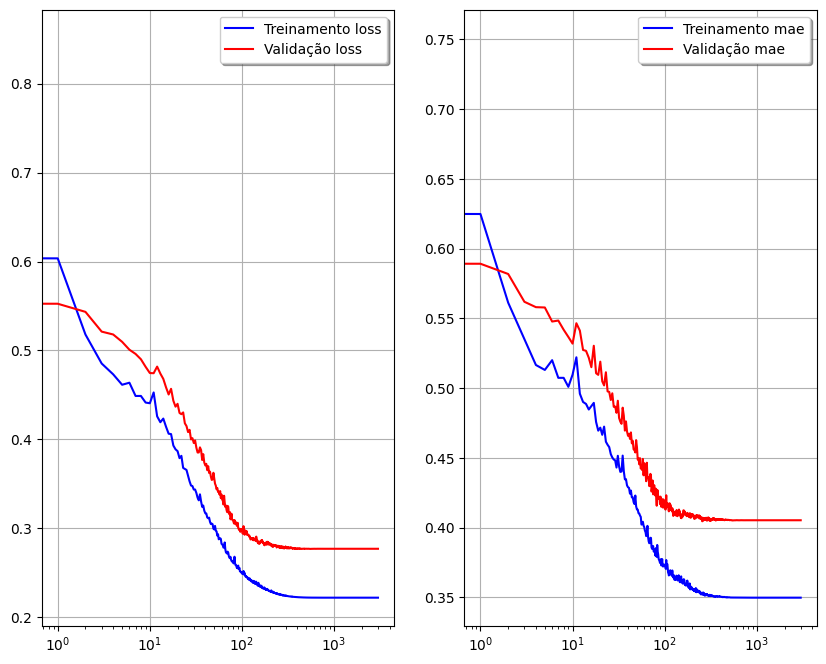

In [16]:
#Vamos ver como foi o treino?

fig, ax = plt.subplots(1,2, figsize=(10,8))

ax[0].semilogx(history.history['loss'], color='b', label="Treinamento loss")
ax[0].semilogx(history.history['val_loss'], color='r', label="Validação loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].grid(True)

ax[1].semilogx(history.history['mae'], color='b', label="Treinamento mae")
ax[1].semilogx(history.history['val_mae'], color='r',label="Validação mae")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].grid(True)
plt.savefig('img/t1_training_validation.png',format='png')
plt.show()

### Como interpretar:
- $R^2$ próximo de 1: modelo explica bem a variabilidade.

- RAE próximo de 0: modelo muito melhor que prever a média.

- Gráfico de resíduos:
    - Distribuição aleatória em torno de 0 → ótimo.
    - Padrões, curvas, cones → o modelo está deixando passar padrões.

In [32]:
# 1. Predições do modelo
y_pred = model.predict(X_test).flatten()
#

# 2. Coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinação R²: {r2:.4f}")

# 3. Erro Absoluto Médio Relativo (RAE)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
print(f"Erro Absoluto Médio Relativo (RAE): {rae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Coeficiente de determinação R²: 0.9476
Erro Absoluto Médio Relativo (RAE): 0.2035


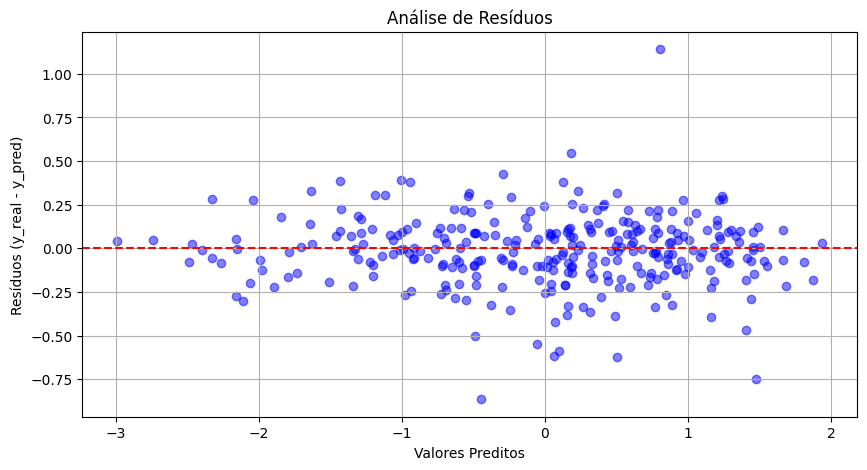

In [72]:
# 4. Análise gráfica de resíduos
residuos = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (y_real - y_pred)')
plt.title('Análise de Resíduos')
plt.grid(True)
plt.savefig('img/t1_residuos.png',format='png')
plt.show()

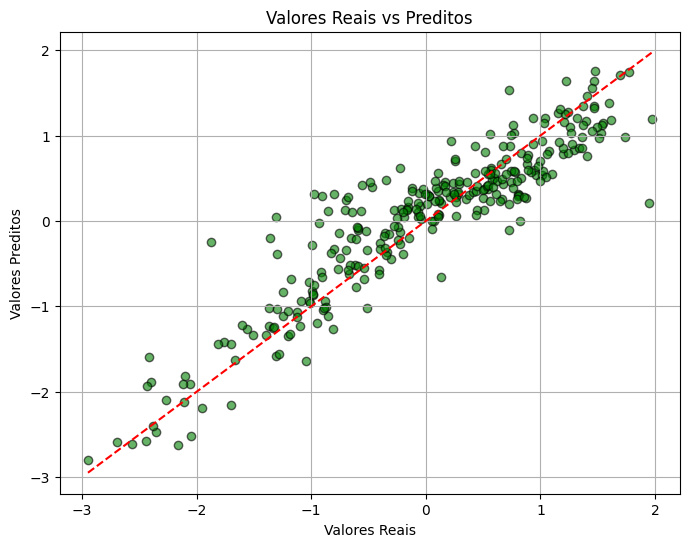

In [56]:
# Gráfico: valores reais vs preditos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha ideal
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.grid(True)
plt.savefig('img/t1_valores_reais_preditos.png',format='png')
plt.show()

### O que esperar:
- Se os pontos estiverem próximos da linha diagonal $y=x$, o modelo está fazendo boas previsões.

- Desvios grandes da linha indicam erros sistemáticos ou outliers.

### Interpretação
- A linha vermelha tracejada representa o ideal: predição = valor real.

- Se os pontos estão bem próximos dessa linha, o modelo tem boa precisão global.

- Padrões ou distorções (curvas, faixas verticais) podem indicar problemas específicos, como erro em regiões extremas.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


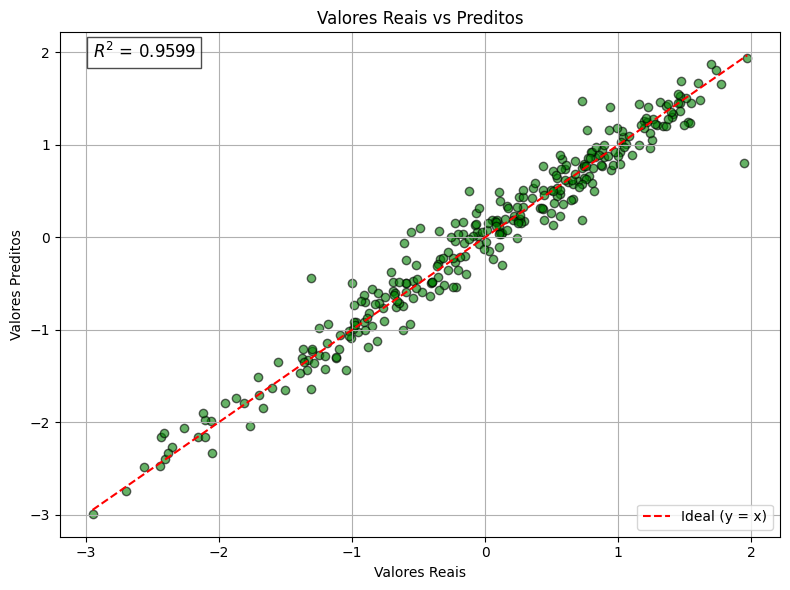

In [71]:
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)

# Gráfico: valores reais vs preditos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal (y = x)')

# Adiciona R² no gráfico
plt.text(x=min(y_test), y=max(y_pred), s=f"$R^2$ = {r2:.4f}", fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('img/t1_valores_reais_preditos_leg.png',format='png')
plt.show()

### Por que isso é útil?
- Torna o gráfico autossuficiente para apresentações e relatórios.
- Permite identificar visualmente a qualidade geral das predições e quantitativamente via $R^2$

# Experimento 1: Quantidade de Neurônios na Camada Oculta
🎯 Objetivo:
Verificar quando parar de aumentar os neurônios, isto é, o ponto em que mais capacidade não melhora o desempenho e pode até prejudicar por overfitting ou complexidade desnecessária.

In [26]:
# Callback personalizado para parar quando o MAE atingir o limiar
class EarlyStoppingByMAE(tf.keras.callbacks.Callback):
    def __init__(self, mae_threshold):
        super().__init__()
        self.mae_threshold = mae_threshold

    def on_epoch_end(self, epoch, logs=None):
        val_mae = logs.get('val_mae')  # ou 'mae' se não usar validação
        if val_mae is not None and val_mae <= self.mae_threshold:
            print(f"\nAtingiu MAE {val_mae:.4f}, parando o treinamento.")
            self.model.stop_training = True

In [ ]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.schedules import ExponentialDecay
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd

# Carregar dados normalizados
#df = pd.read_csv("airfoil_self_noise_normalizado.csv")
#X = df.drop(columns=['pressao_sonora']).values
#y = df['pressao_sonora'].values

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista para armazenar resultados
resultados = []
neuronios_testados = []

# Loop para testar diferentes quantidades de neurônios
for neuronios in range(10, 10000, 100):
    # Aprendizado com decaimento exponencial
    lr_schedule = ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=100,
        decay_rate=0.96,
        staircase=True
    )

    # Modelo MLP
    model = Sequential([
        Dense(neuronios, activation='relu', input_shape=(X.shape[1],)),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse',
    metrics=['mae'])

    model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0,
    callbacks=[EarlyStoppingByMAE(mae_threshold=0.1)])

    # Avaliação
    y_pred = model.predict(X_test).flatten()
    r2 = r2_score(y_test, y_pred)

    resultados.append(r2)
    neuronios_testados.append(neuronios)
    model.save(f'./models/mlp_model_n{neuronios}.keras')
    

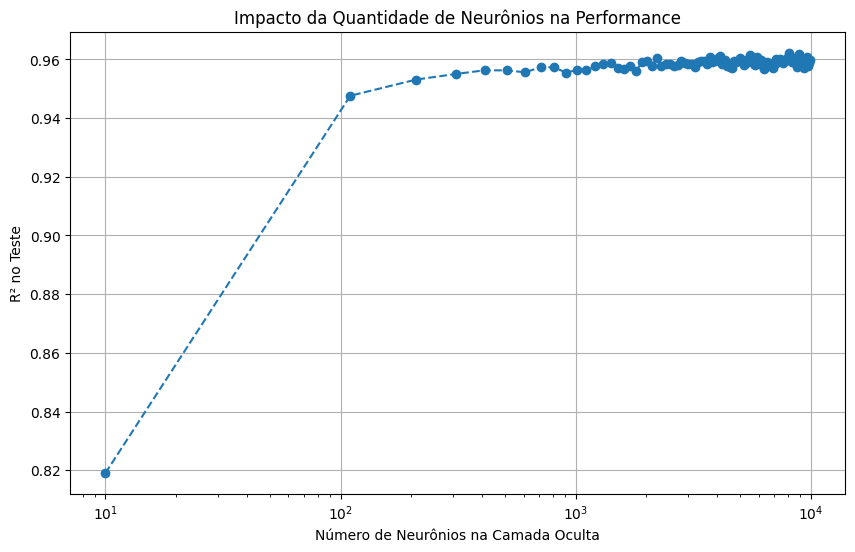

In [70]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.semilogx(neuronios_testados, resultados, marker='o', linestyle='--')
plt.xlabel("Número de Neurônios na Camada Oculta")
plt.ylabel("R² no Teste")
plt.title("Impacto da Quantidade de Neurônios na Performance")
plt.grid(True)
plt.savefig('img/t1_impacto_neuronio_performace.png',format='png')
plt.show()

### Interpretação esperada
Se o gráfico satura ou oscila, quer dizer que aumentar a capacidade não melhora mais o modelo.

Pode indicar que o problema tem baixa complexidade e poucos neurônios são suficientes.

Excesso de neurônios pode gerar overfitting ou ineficiência computacional.

# Experimento 2: Comparar MLP com Regressão Linear
🎯 Objetivo:
Avaliar se usar uma rede neural realmente oferece vantagens em relação a um modelo clássico mais simples, como a regressão linear.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Reutilizando os dados do experimento anterior
# X_train, X_test, y_train, y_test já estão definidos

# Modelo de Regressão Linear
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_linear = reg_linear.predict(X_test)

# Métricas da Regressão Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"[Regressão Linear] MSE: {mse_linear:.4f}")
print(f"[Regressão Linear] R²: {r2_linear:.4f}")

# Agora comparamos com o melhor modelo MLP do experimento anterior
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Parâmetros do melhor modelo do experimento 1 (ex: 50 neurônios)
melhor_modelo = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X.shape[1],)),
    Dense(1, activation='linear')
])

lr_schedule = ExponentialDecay(0.01, decay_steps=100, decay_rate=0.96, staircase=True)
melhor_modelo.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse')
melhor_modelo.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

y_pred_mlp = melhor_modelo.predict(X_test).flatten()
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"[MLP] MSE: {mse_mlp:.4f}")
print(f"[MLP] R²: {r2_mlp:.4f}")


[Regressão Linear] MSE: 0.4650
[Regressão Linear] R²: 0.5583


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[MLP] MSE: 0.1711
[MLP] R²: 0.8374


### Como interpretar os resultados

|Modelo|	Vantagens|	Quando preferir|
|---|---|---|
|Regressão Linear|	Rápido, simples, explicável|	Quando há relação linear forte|
|MLP (Rede Neural)|	Aprende relações não lineares|	Quando há padrões complexos|


Se o R² da MLP for significativamente maior, então vale a pena usar a rede neural.

Se a diferença for pequena, a simplicidade da regressão linear pode ser preferível.

# Experimento 3: Extrapolação com Dados Fora do Domínio
## 🎯 Objetivo:
Verificar como a rede neural se comporta ao fazer predições para dados que estão fora da faixa observada no treino — ou seja, situações onde não há garantia de cobertura do espaço de entrada.

Isso é importante porque redes neurais são bons interpoladores, mas geralmente não extrapolam bem.

## ✅ Passos do experimento
Treinar a MLP com os dados normais.

Criar um conjunto de dados sintéticos fora da faixa dos dados de treino (ex: frequências muito altas, ângulos de ataque extremos).

Observar as predições e comparar com a tendência esperada.

Avaliar se a rede responde de forma consistente ou se gera valores absurdos.

In [13]:
#import numpy as np
#import pandas as pd

# Reutilizar o modelo treinado do experimento anterior: melhor_modelo

# Observar os limites reais dos dados
#df = pd.read_csv("airfoil_self_noise_normalizado.csv")
#X_real = df.drop(columns=['pressao_sonora'])
X_real =airfoil_self_noise.drop(columns=['pressão_sonora'])

# Exemplo: extrapolar a frequência e espessura para além dos limites
X_extra = X_real.copy()

# Frequência original padronizada varia até ~5.4 → vamos colocar 6.5
X_extra['frequência'] = 6.5
X_extra['espessura_sucção'] = 4.5  # também além do máximo original (~3.6)

# Pegamos uma amostra de 10 linhas modificadas para testar extrapolação
X_extra_sample = X_extra.sample(10, random_state=42).values

# Predição para dados fora do domínio
y_extrapolado = melhor_modelo.predict(X_extra_sample).flatten()

# Mostrar os resultados
for i, pred in enumerate(y_extrapolado):
    print(f"Amostra {i+1}: Pressão predita (extrapolada): {pred:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Amostra 1: Pressão predita (extrapolada): -2.0962
Amostra 2: Pressão predita (extrapolada): -0.0904
Amostra 3: Pressão predita (extrapolada): -1.6585
Amostra 4: Pressão predita (extrapolada): -2.2081
Amostra 5: Pressão predita (extrapolada): -2.0871
Amostra 6: Pressão predita (extrapolada): -1.3351
Amostra 7: Pressão predita (extrapolada): 0.0839
Amostra 8: Pressão predita (extrapolada): -0.8269
Amostra 9: Pressão predita (extrapolada): -0.9036
Amostra 10: Pressão predita (extrapolada): -1.1660


### Como interpretar
Se as predições parecerem coerentes com a tendência aprendida, ótimo.

Se a rede retornar valores exageradamente altos ou negativos, isso mostra que ela não generaliza bem fora do intervalo dos dados.

Extrapolação é sempre arriscada com redes neurais, especialmente com ativação sigmoide, que pode saturar.

In [10]:
import numpy as np
import soundfile as sf
import pandas as pd

airfoil_self_noise = pd.read_table('./airfoil+self+noise/airfoil_self_noise.dat',
                                   names=["frequência","angulo_ataque","comprimento_corda","velocidade_fluxo",
                                          "espessura_sucção","pressão_sonora"])

s_freq = airfoil_self_noise['frequência']
s_pre_som = airfoil_self_noise['pressão_sonora']

# Tabela de exemplo: frequências e dB SPL
data = np.vstack((s_freq, s_pre_som)).T

duration = 2.0  # segundos
sample_rate = 44100
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Função para converter dB SPL em amplitude linear
def db_to_amplitude(db):
    return 10 ** (db / 20)

# Gerar som somando senóides
signal = np.zeros_like(t)
for freq, db in data:
    amp = db_to_amplitude(db)
    signal += amp * np.sin(2 * np.pi * freq * t)

# Normalizar para evitar clipping
signal /= np.max(np.abs(signal))

# Salvar como WAV
sf.write("sintetizado.wav", signal, sample_rate)


In [42]:
airfoil_self_noise = pd.read_table('./airfoil+self+noise/airfoil_self_noise.dat',
                                   names=["frequência","angulo_ataque","comprimento_corda","velocidade_fluxo",
                                          "espessura_sucção","pressão_sonora"])

X = airfoil_self_noise.drop(columns=['pressão_sonora']).values
y = airfoil_self_noise['pressão_sonora'].values
mean_train = X.mean()
std_train = X.std()

In [46]:
mean_train, std_train

(588.8342615090124, 1818.3827353482748)

In [43]:
import numpy as np
rng = np.random.default_rng()
def rng_linspace(_b, _e, _l):
    x = np.linspace(_b, _e, _l)
    rng.shuffle(x)
    return x

In [44]:

# Criar matriz de entrada extrapolada
extrapolated = pd.DataFrame({
    'frequência': rng_linspace(22000, 30000, 10),
    'angulo_ataque': rng_linspace(15, 25, 10),
    'comprimento_corda': rng_linspace(0.3, 0.5, 10),
    'velocidade_fluxo': rng_linspace(70, 90, 10),
    'espessura_sucção': rng_linspace(0.015, 0.025, 10)
})
scaled_extrap = (extrapolated - mean_train) / std_train

In [48]:
scaled_extrap

,frequência,angulo_ataque,comprimento_corda,velocidade_fluxo,espessura_sucção
0,14.219014,-0.310075,-0.323548,-0.285327,-0.323809
1,12.752510,-0.311908,-0.323573,-0.281661,-0.323812
2,11.774840,-0.311297,-0.323621,-0.284105,-0.323812
3,13.730179,-0.315574,-0.323646,-0.274329,-0.323810
4,13.241345,-0.312519,-0.323585,-0.277995,-0.323815
5,12.263675,-0.313130,-0.323597,-0.279217,-0.323811
6,14.707849,-0.313741,-0.323609,-0.276773,-0.323814
7,16.174354,-0.314352,-0.323560,-0.280439,-0.323811
8,15.685519,-0.310686,-0.323634,-0.275551,-0.323813
9,15.196684,-0.314963,-0.323658,-0.282883,-0.323814


In [45]:
preds = model.predict(scaled_extrap)
print("Predições:", preds.flatten())

min_train = airfoil_self_noise['pressão_sonora'].min()
max_train = airfoil_self_noise['pressão_sonora'].max()
print("Intervalo observado no treino:", min_train, "-", max_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predições: [-3.749277  -3.5552106 -3.4240084 -3.6848369 -3.6204808 -3.4888759
 -3.7964535 -3.958211  -3.9036095 -3.8465543]
Intervalo observado no treino: 103.38 - 140.987


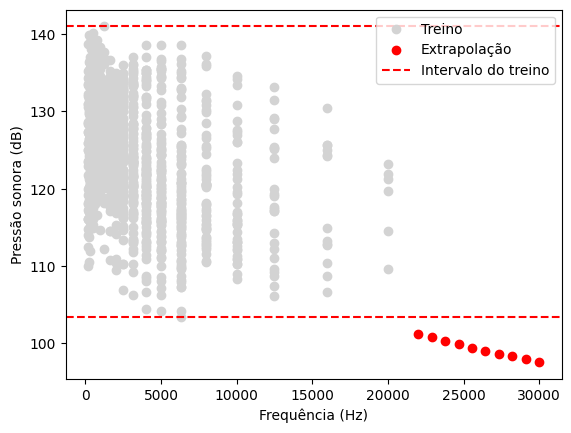

In [41]:
#import matplotlib.pyplot as plt
preds_o = preds * y.std() + y.mean()
# Histórico do treino
plt.figure()
plt.scatter(airfoil_self_noise['frequência'], airfoil_self_noise['pressão_sonora'], color='lightgray', label='Treino')
plt.scatter(extrapolated['frequência'], preds_o, color='red', label='Extrapolação')
plt.axhline(min_train, color='red', linestyle='--', label='Intervalo do treino')
plt.axhline(max_train, color='red', linestyle='--')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Pressão sonora (dB)')
plt.legend()
plt.savefig('img/extrapolacao.png',format='png')
plt.show()
